## 36106: Machine Learning Algorithms and Applications (MLAA)

### AT3: Group Project

### Group 27

#### Use Case: Classification

### 1. Business Understanding

The project involves working with a bank transactional data and its customers data collected by the bank for the past three years.  One of the use cases for classification requires developing a machine learning model that can effectively analyse transactional data and accurately identify fraudulent transactions.

The following activitives are performed as part of the Classification Use Case.

1. Business Understanding

2. Data Understanding

        2.1] Loading Data
        2.2] Exploring Data
        2.3] Combining the Bank Transactions and Customers Data

3. Data Preparation

        3.1] Featuring Engineering
                - Extracting transaction's date related information 
                - Calculating the distance i.e. how far the transaction occurred from the customer's resident
                - Calculating age of the customers
        3.2] Features Selection
                - Checking the distribution of values of the numerical features
                - Checking outliers in the numerical features
                - Checking unique values of the categorical features
                - Selecting features
        3.3] Transforming Categorical Data into Numerical
                - Transforming 'job' and 'merchant' using Indexing(LabelEncoder)
                - Transforming 'category' using OneHot Encoding
                - Transforming data type of target 'is_fraud' variable
        3.4] Splitting Data into Different Sets
                - Checking the frequency rates of classes of the target variable from the Original dataset
                - Splitting the bank dataset into data - 80% and testing - 20%
                - Performing undersampling on the data set
                - Splitting the sampled dataset into training - 80% and validation - 20%
        3.5] Features Scaling

4. Modeling

        4.1] Assessing Baseline Performance
        4.2] Training Classification Models
                - XGBoost (eXtreme Gradient Boosting)
                - Random Forest
                - Random Forest with Important Features
                - MLPClassifier Neural Networks

5. Model Evaluation

        5.1] Analysing Model Performance
    
6. Deployment Suggestion

In [1891]:
# Importing Python and other required packages
import pandas as pd
import numpy as np
import os
import glob
import datetime
from math import radians, sin, cos, sqrt, atan2
from scipy.stats import uniform, randint

# Importing SKLearn and other packages required for the classification 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Importing required Data Visualization packages
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Data Understanding

#### 2.1] Loading data

**• Loading bank transactions details**

In [1892]:
# Get a list of all CSV files from the current directory path
transaction_files = glob.glob(os.path.join('/Users/monalipatil/Monali/MDSI-Semester1/Machine Learning Algorithms and Applications/Assignment3/final/transactions*.csv'))

# Defining the dataframe to store all the transactions data
df_transactions = pd.DataFrame()

# Iterating over each CSV file
for filename in transaction_files:
    try:
        # Reading the CSV file into a dataframe
        df_transaction_file = pd.read_csv(filename, delimiter='|')
        df_transactions = pd.concat([df_transactions, df_transaction_file], ignore_index=True)
    except pd.errors.ParserError:
        print(f'Error parsing file: {filename}')
        continue

In [1893]:
# Checking initial records of the transaction dataset
df_transactions.head(3)

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4896331812335761701,149852234418,f3ec0819590302134f03ffdc2f44697f,1646060228,gas_transport,65.17,0,"Larson, Ryan and Huang",38.143430,-90.327335
1,4896331812335761701,149852234418,c1607c993e41f2c3b42d72d1506bef7b,1644848624,gas_transport,47.58,0,Myers-Reed,39.119498,-90.760379
2,4896331812335761701,149852234418,6f530db25d20fe351249a54491fd3fde,1645632153,gas_transport,64.43,0,Baker-Bullock,39.384368,-90.361517


**•  Loading bank customers details**

In [1894]:
# Reading customers details
df_customers = pd.read_csv('/Users/monalipatil/Monali/MDSI-Semester1/Machine Learning Algorithms and Applications/Assignment3/final/customers.csv', delimiter='|')

In [1895]:
# Checking initial records of the customer dataset
df_customers.head(3)

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479


#### 2.2] Exploring data

• Checking dimension of the datasets

In [1896]:
# Checking the size of the datasets
print('Transactions:', df_transactions.shape)
print('Customers:', df_customers.shape)

Transactions: (4260904, 10)
Customers: (1000, 15)


• Checking column names

In [1897]:
# Checking the column names of the datasets
print('Transactions:', df_transactions.columns)
print('Customers:', df_customers.columns)

Transactions: Index(['cc_num', 'acct_num', 'trans_num', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long'],
      dtype='object')
Customers: Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num'],
      dtype='object')


• Describing summary information of the datasets

In [1898]:
# Checking summary information of the transaction dataset
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      object 
 1   acct_num    object 
 2   trans_num   object 
 3   unix_time   object 
 4   category    object 
 5   amt         float64
 6   is_fraud    object 
 7   merchant    object 
 8   merch_lat   float64
 9   merch_long  float64
dtypes: float64(3), object(7)
memory usage: 325.1+ MB


The above transactions summary information indicates that among the features, three are numerical while the remaining are categorical. Also the target variable, 'is_fraud' is categorical in nature.

In [1899]:
# Checking summary information of the customer dataset
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssn       1000 non-null   object 
 1   cc_num    1000 non-null   int64  
 2   first     1000 non-null   object 
 3   last      1000 non-null   object 
 4   gender    1000 non-null   object 
 5   street    1000 non-null   object 
 6   city      1000 non-null   object 
 7   state     1000 non-null   object 
 8   zip       1000 non-null   int64  
 9   lat       1000 non-null   float64
 10  long      1000 non-null   float64
 11  city_pop  1000 non-null   int64  
 12  job       1000 non-null   object 
 13  dob       1000 non-null   object 
 14  acct_num  1000 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


The above customers summary information indicates that among the features in the dataset, six are of numerical type while the rest are categorical. And, it highlights that there are no null values present in the dataset.

• Checking summary statistics of the datasets

In [1900]:
# Checking statistics of the transaction dataset
df_transactions.describe(include='all')

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
count,4.260904e+06,4.260904e+06,4260904,4.260904e+06,4260904,4.260904e+06,4260904.0,4260904,4.260904e+06,4.260904e+06
unique,9.830000e+02,9.830000e+02,4260904,4.114752e+06,14,NaN,2.0,21977,NaN,NaN
top,3.472085e+14,1.154613e+10,f3ec0819590302134f03ffdc2f44697f,1.670148e+09,shopping_pos,NaN,0.0,Smith PLC,NaN,NaN
freq,1.091200e+04,1.091200e+04,1,5.000000e+00,420268,NaN,4255870.0,5737,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,6.898790e+01,NaN,NaN,3.735276e+01,-9.247610e+01
std,NaN,NaN,NaN,NaN,NaN,1.618467e+02,NaN,NaN,5.504630e+00,1.741603e+01
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,1.859001e+01,-1.603677e+02
25%,NaN,NaN,NaN,NaN,NaN,9.100000e+00,NaN,NaN,3.370138e+01,-9.903072e+01
50%,NaN,NaN,NaN,NaN,NaN,4.449000e+01,NaN,NaN,3.819365e+01,-8.727445e+01
75%,NaN,NaN,NaN,NaN,NaN,8.158000e+01,NaN,NaN,4.120567e+01,-7.966098e+01


The above result indicates that cc_num, acct_num, and trans_num, which represent credit card number, account number, and transaction number respectively, are unique identifiers and to enable model to learn generalized patterns, it is important to eliminate these identifier features.

In [1901]:
# Checking statistics of the customer dataset
df_customers.describe(include='all')

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
count,1000,1.000000e+03,1000,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000,1000,1.000000e+03
unique,1000,NaN,367,487,2,1000,736,51,NaN,NaN,NaN,NaN,507,978,NaN
top,115-04-4507,NaN,Michael,Williams,F,863 Lawrence Valleys,Brooklyn,CA,NaN,NaN,NaN,NaN,Computer games developer,1962-11-16,NaN
freq,1,NaN,25,24,512,1,13,107,NaN,NaN,NaN,NaN,7,2,NaN
mean,NaN,3.656964e+17,NaN,NaN,NaN,NaN,NaN,NaN,51786.20900,37.422795,-92.505277,2.867058e+05,NaN,NaN,4.995849e+11
std,NaN,1.227337e+18,NaN,NaN,NaN,NaN,NaN,NaN,29933.13195,5.574397,17.510134,5.329632e+05,NaN,NaN,2.894933e+11
min,NaN,6.040027e+10,NaN,NaN,NaN,NaN,NaN,NaN,1571.00000,19.589300,-159.368300,1.050000e+02,NaN,NaN,2.348758e+09
25%,NaN,1.800353e+14,NaN,NaN,NaN,NaN,NaN,NaN,27528.25000,33.712500,-99.159475,2.022950e+04,NaN,NaN,2.620636e+11
50%,NaN,3.517359e+15,NaN,NaN,NaN,NaN,NaN,NaN,49016.00000,38.431750,-87.156600,6.728250e+04,NaN,NaN,4.915295e+11
75%,NaN,4.538733e+15,NaN,NaN,NaN,NaN,NaN,NaN,78599.00000,41.220300,-80.018850,2.499788e+05,NaN,NaN,7.571575e+11


Similarly, within the customers dataset, the identifiers ssn and cc_num, representing social security number and customer number respectively and the customer's name, should be removed.

• Checking if any null values in the datasets

In [1902]:
# Checking null values in the transaction dataset
df_transactions.isnull().sum()

cc_num        0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64

In [1903]:
# Checking null values in the customer dataset
df_customers.isnull().sum()

ssn         0
cc_num      0
first       0
last        0
gender      0
street      0
city        0
state       0
zip         0
lat         0
long        0
city_pop    0
job         0
dob         0
acct_num    0
dtype: int64

• Checking if any duplicate values in the datasets

In [1904]:
# Checking duplicate values in the datasets
print('Transactions:', df_transactions.duplicated().sum())
print('Customers:', df_customers.duplicated().sum())

Transactions: 0
Customers: 0


The transaction and customers datasets do not contain any null and duplicated values.

#### 2.3] Combining the bank transactions and customers datasets

In [1905]:
# Combining transactions and customers details based on the bank account number identifier of the customer
df_bank_data = pd.merge(df_transactions, df_customers, on='acct_num', how='left')

# Checking initial records 
df_bank_data.head(3)

,cc_num_x,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,gender,street,city,state,zip,lat,long,city_pop,job,dob
0,4896331812335761701,149852234418,f3ec0819590302134f03ffdc2f44697f,1646060228,gas_transport,65.17,0,"Larson, Ryan and Huang",38.143430,-90.327335,...,M,4457 Mercado Extensions,Brussels,IL,62013,38.9255,-90.5968,552,Patent attorney,2002-07-27
1,4896331812335761701,149852234418,c1607c993e41f2c3b42d72d1506bef7b,1644848624,gas_transport,47.58,0,Myers-Reed,39.119498,-90.760379,...,M,4457 Mercado Extensions,Brussels,IL,62013,38.9255,-90.5968,552,Patent attorney,2002-07-27
2,4896331812335761701,149852234418,6f530db25d20fe351249a54491fd3fde,1645632153,gas_transport,64.43,0,Baker-Bullock,39.384368,-90.361517,...,M,4457 Mercado Extensions,Brussels,IL,62013,38.9255,-90.5968,552,Patent attorney,2002-07-27


As the account number is unique and available in both datasets, combining the datasets using 'acct_num' account number feature as the key.

In [1906]:
# Checking the rows and columns size
df_bank_data.shape

(4260904, 24)

In [1907]:
# Checking the column names
df_bank_data.columns

Index(['cc_num_x', 'acct_num', 'trans_num', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'ssn', 'cc_num_y',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob'],
      dtype='object')

### 3. Data Preparation

#### 3.1] Feature Engineering

**• Extracting transaction's date related information**

In [1908]:
# Transforming unixtime to datetime
df_bank_data['datetime'] = pd.to_datetime(df_bank_data['unix_time'], unit='s')

In [1909]:
# Checking the sample rows for new feature 'datetime'
df_bank_data.sample(3)

,cc_num_x,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,street,city,state,zip,lat,long,city_pop,job,dob,datetime
1035418,4037788925546656,386189485379,6cfdb795badcfe0ee4ee0a9d66c20d5c,1671690215,personal_care,53.05,0,Smith-Jones,35.130415,-83.380570,...,51864 Cummings Shoals Apt. 519,Walhalla,SC,29691,34.8457,-83.0672,11333,Counsellor,1982-09-08,2022-12-22 06:23:35
3622128,4208581745273533,154405868597,6341266fb209fc6cf6cab0666521a457,1648722046,home,12.63,0,Dodson LLC,41.819562,-87.083738,...,7004 Erik Court,Evanston,IL,60202,42.0302,-87.6865,79009,"Surveyor, minerals",1988-04-17,2022-03-31 10:20:46
1057662,4028772175354087,452704326218,55ea1dbf68977f7632d290ef76b5eb5e,1647541353,grocery_pos,2.03,0,"Stuart, Bowman and Miller",29.954180,-95.237138,...,17797 Melissa Mission Suite 170,Pasadena,TX,77502,29.6789,-95.1982,145975,"Civil engineer, contracting",1995-08-01,2022-03-17 18:22:33


As the unix_time is in unreadable format, it is necessary to convert it into a more readable format.

In [1910]:
# Separating date information i.e. 'year', 'month', 'year', 'day', 'hour', 'minute' & 'second' as new features
df_bank_data['year'] = df_bank_data['datetime'].apply(lambda x: x.year)
df_bank_data['month'] = df_bank_data['datetime'].apply(lambda x: x.month)
df_bank_data['day'] = df_bank_data['datetime'].apply(lambda x: x.day)
df_bank_data['hour'] = df_bank_data['datetime'].apply(lambda x: x.hour)
df_bank_data['minute'] = df_bank_data['datetime'].apply(lambda x: x.minute)
df_bank_data['second'] = df_bank_data['datetime'].apply(lambda x: x.second)

In [1911]:
# Checking the sample rows for new features 'year', 'month', 'year', 'day', 'hour', 'minute' & 'second'
df_bank_data.sample(3)

,cc_num_x,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,city_pop,job,dob,datetime,year,month,day,hour,minute,second
2432504,30279103368290,957000539170,795837b165ae2dcfa40bebff127a2638,1646538435,kids_pets,48.26,0,Ramsey Group,37.712154,-75.893849,...,6471,Retail buyer,1962-12-09,2022-03-06 03:47:15,2022,3,6,3,47,15
3650786,4635049602667653,23079585520,b6f473bc721765620d86b4ce95a03521,1576265037,misc_net,40.87,0,Reynolds Ltd,40.504420,-75.535502,...,4637,Theatre director,1993-10-12,2019-12-13 19:23:57,2019,12,13,19,23,57
871064,4888818930461631,834942757900,73919e53bd5ac8aa12a189d4ea7ceb1b,1581605886,misc_pos,173.60,0,Cain LLC,40.919218,-74.305912,...,8675,Museum/gallery curator,1946-09-14,2020-02-13 14:58:06,2020,2,13,14,58,6


From the date information, other relevant details such as the transaction's 'year', 'month', 'day', 'hour', 'minute', and 'second' is extracted that can help in capturing patterns and trends associated with fraudulent behavior.

**• Calculating the distance i.e. how far the transaction occurred from the customer's resident**

In [1912]:
# Defining function to calculate distance using Haversine formulas
# The function takes four parameters: merchant's lat1, lon1 and customer's resdential lat2, and lon2
def calculate_distance_km(lat1, lon1, lat2, lon2):

    # Converting the latitude and longitude values from degrees to radians using the radians function from the math module
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Radius of the Earth in kilometers as a constant value
    earth_radius = 6371.0

    # Calculating the differences in longitude (dlon) and latitude (dlat) between the two sets of coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Calculating the intermediate values a and c required by the Haversine formula
    # These calculations involve trigonometric functions (sin, cos, sqrt, atan2) to determine the great-circle distance between the two points
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Calculating the final distance using the Haversine formula by multiplying the Earth's radius by the above calculated c value
    distance = earth_radius * c

    # Returning the calculated distance in kilometers
    return distance

In [1913]:
# Applying the distance calculation to create a new feature
df_bank_data['distance_km'] = df_bank_data.apply(lambda row: calculate_distance_km(row['merch_lat'], row['merch_long'], row['lat'], row['long']), axis=1)

Using the latitude and longitude coordinates of both the customer's residence and the merchant's location where the transaction took place, the distance between these two locations is calculated that might indicate suspicious transactions.

**• Calculating age of the customers**

In [1914]:
# Converting the date of birth 'dob' column to the datetime format
df_bank_data['dob'] = pd.to_datetime(df_bank_data['dob'])

In [1915]:
# The current date will serve as the reference point for calculating the age of customers
current_date = datetime.datetime.now()

In [1916]:
# Defining a function that calculates the age of customer based on the date of birth and the current date
def calculate_customers_age(date_of_birth):

    # Calculating the difference between the current date and the date of birth in years
    age = current_date.year - date_of_birth.year
    if current_date.month < date_of_birth.month or (current_date.month == date_of_birth.month and current_date.day < date_of_birth.day):
        age -= 1
    return age

In [1917]:
# Applying the calculate_customers_age function to the 'dob' column to create a new 'age' column
df_bank_data['age'] = df_bank_data['dob'].apply(calculate_customers_age)

In [1918]:
# Checking the sample rows for new features 'distance_km' and 'age'
df_bank_data.sample(3)

,cc_num_x,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,dob,datetime,year,month,day,hour,minute,second,distance_km,age
277711,6011473650032991,272682708416,8648e83e08e49e509c9e2d36d7b2eba7,1559079569,gas_transport,9.76,0,"Rivera, English and Davis",34.367412,-78.301622,...,1965-03-31,2019-05-28 21:39:29,2019,5,28,21,39,29,109.342436,58
2235965,6011898331465915,49136416256,dea9f8882a4da5b42bc8a7b6f9654fd7,1580662556,misc_pos,7.29,0,Smith Ltd,38.829409,-78.287584,...,1977-05-12,2020-02-02 16:55:56,2020,2,2,16,55,56,81.445435,46
2124331,2702512868230047,978753281962,d22354f4c6814e6ca2bb94aaa921a480,1576362344,misc_net,9.85,0,Peterson-Strickland,35.605768,-79.889864,...,1987-04-06,2019-12-14 22:25:44,2019,12,14,22,25,44,104.359796,36


Based on the customer's date of birth 'dob', the age is calculated since particular age groups might be more inclined to participate in fraudulent activities. 

#### 3.2] Features Selection

• Checking the distribution of values of the numerical features

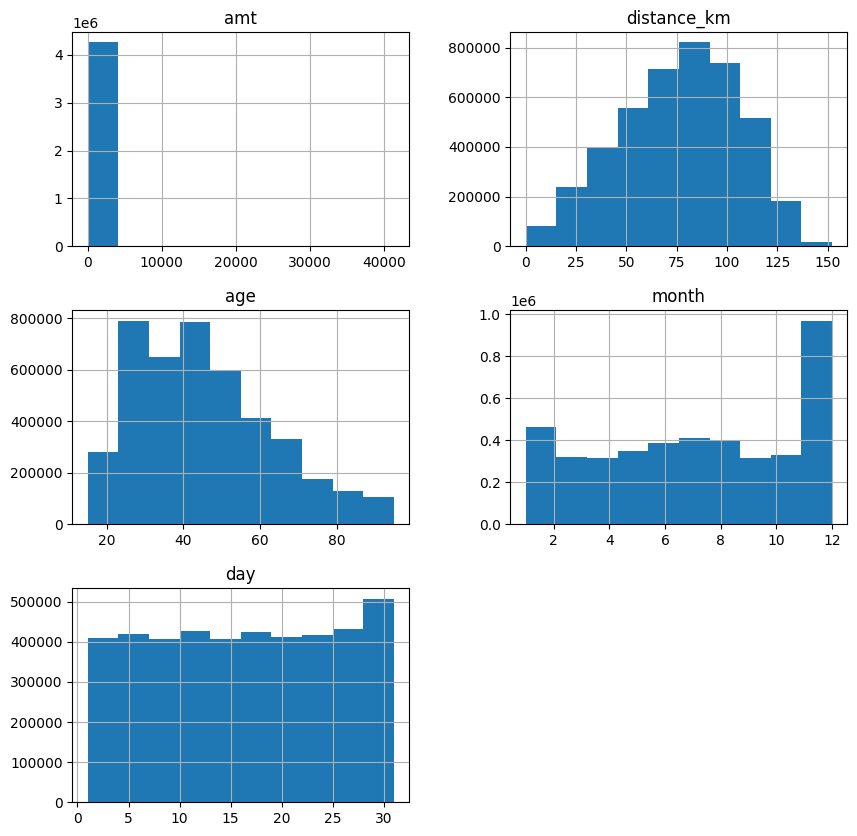

In [1919]:
# Selecting the numerical features from the dataset to check distribution of their values
df_numerical_features = df_bank_data[['amt', 'distance_km', 'age', 'month', 'day']]

# Creating histogram of the selected numerical features
histogram = df_numerical_features.hist(figsize=(10,10))

The graphs above, illustrating the distribution of numerical feature values, suggest that the data is fairly distributed and does not show significant skewness.

The significant increase in transaction volume towards the end of the year signifies the holiday season, particularly the Christmas festivities, and the corresponding spending patterns associated with it.

• Checking outliers in the numerical features

<Axes: xlabel='amt'>

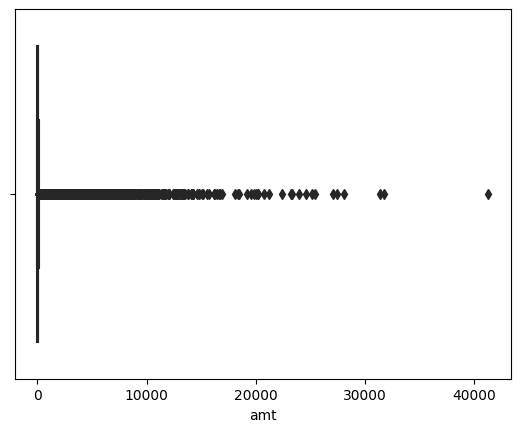

In [1920]:
# Ploting the graph for 'amt' feature
sns.boxplot(x='amt', data=df_numerical_features, color='green')

• Checking the rows with transaction amount i.e. 'amt' >= 30000

In [1921]:
# Displaying the rows with amt >= 30000
df_bank_data[df_bank_data['amt'] >= 30000]

,cc_num_x,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,dob,datetime,year,month,day,hour,minute,second,distance_km,age
536255,377800244323620,882138752516,b2d22320cec61eba3009368c2093f6f4,1627878405,health_fitness,31772.59,0,"Santiago, Carroll and Chen",40.917353,-72.726208,...,1954-10-04,2021-08-02 04:26:45,2021,8,2,4,26,45,85.918559,68
907702,4823134275576720,246413063417,3fd1be2a78f5d2227f3922f373188c09,1592569545,shopping_net,41300.53,0,Vaughn-Hogan,28.147489,-81.973396,...,2007-08-20,2020-06-19 12:25:45,2020,6,19,12,25,45,119.990064,15
1282908,4571983863842,664596582306,264618bb89847488796f35fd267c652a,1632037307,health_fitness,31412.68,0,Garza Ltd,42.887923,-79.610140,...,1941-12-24,2021-09-19 07:41:47,2021,9,19,7,41,47,65.238855,81


The transactions conducted by elderly customers belong to health-related matters, which appears logical and potentially associated with their health conditions. In contrast, the second transaction observed in the results is made by a teenager for an online shopping purpose. These transactions are classified as non-fraudulent, as indicated by a value of 0. 

<Axes: xlabel='distance_km'>

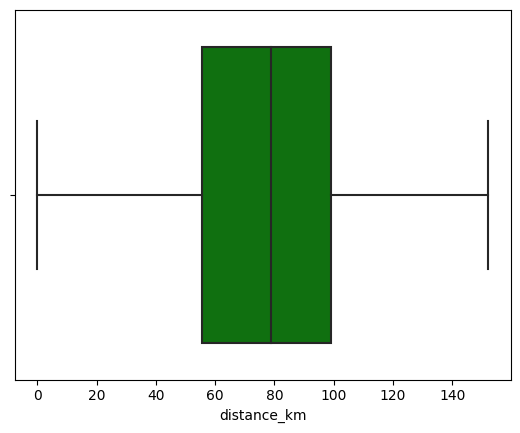

In [1922]:
# Ploting the graph for 'distance_km' feature
sns.boxplot(x='distance_km', data=df_numerical_features, color='green')

• Checking the rows with distance_km >= 151

In [1923]:
# Displaying the rows with distance_km >= 151
df_bank_data[df_bank_data['distance_km'] >= 151]

,cc_num_x,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,dob,datetime,year,month,day,hour,minute,second,distance_km,age
683612,213186702440330,167155722951,255b5db0f3afe4f09ad2818d5efb574c,1554316535,gas_transport,2.64,0,Chavez Inc,18.599113,-155.991401,...,1965-06-17,2019-04-03 18:35:35,2019,4,3,18,35,35,152.109157,57
1348950,2687017999324205,856538458652,5bbea0f3541b9c9a058b0fa44f679dc7,1548189904,gas_transport,62.20,0,Moore-Harris,21.092325,-158.346945,...,1998-05-13,2019-01-22 20:45:04,2019,1,22,20,45,4,151.235304,25
1349952,2687017999324205,856538458652,e6ebf7921279ca7dad06224a98bdb200,1624246356,entertainment,195.64,0,Watson-Richardson,21.087811,-158.349389,...,1998-05-13,2021-06-21 03:32:36,2021,6,21,3,32,36,151.431926,25
3109420,3559229127065930,22301959346,4b08af70481a5636e71831a9b2034ab0,1667360092,home,8.22,0,Cunningham and Sons,18.704052,-156.071801,...,1983-10-19,2022-11-02 03:34:52,2022,11,2,3,34,52,151.229074,39
3109674,3559229127065930,22301959346,4dcde19be5dcc0f7339b38758c257074,1664020293,health_fitness,3.77,0,"Grant, Sawyer and Scott",20.689696,-156.089344,...,1983-10-19,2022-09-24 11:51:33,2022,9,24,11,51,33,151.132215,39
3327823,3559229127065930,22301959346,f62932cbd14812d1451edae1ceca4188,1654570918,home,47.82,0,Johnson-Holloway,18.719713,-154.095291,...,1983-10-19,2022-06-07 03:01:58,2022,6,7,3,1,58,151.449178,39
3335762,30295458583564,807450374964,565309fa39c1081a951b3caf1a7e0777,1625894234,food_dining,142.97,0,Lambert-Hamilton,18.711453,-156.082856,...,1983-06-26,2021-07-10 05:17:14,2021,7,10,5,17,14,151.418119,39


Even though the transactions taking place away the customers' residential locations, they seem to be related to travel based on the transaction category. Also, these transactions are marked as non-fraudulent, denoted by a value of 0.

<Axes: xlabel='age'>

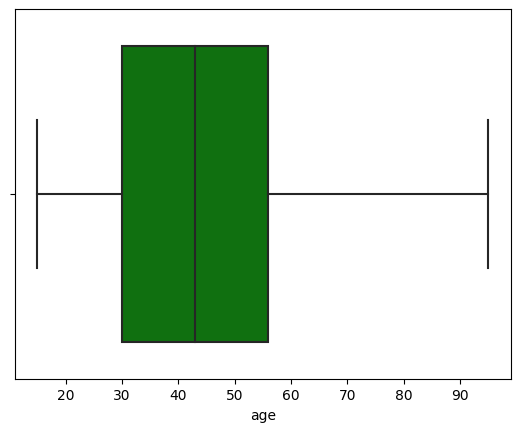

In [1924]:
# Ploting the graph for 'age' feature
sns.boxplot(x='age', data=df_numerical_features, color='green')

• Checking the rows with customer's age < 16

In [1925]:
# Displaying the rows with age < 16
df_bank_data[df_bank_data['age'] < 16]

,cc_num_x,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,dob,datetime,year,month,day,hour,minute,second,distance_km,age
7523,4823134275576720,246413063417,5c611ba937be6764d6ef1690a28b4d32,1642798189,gas_transport,59.73,0,"Valencia, Faulkner and Brown",29.214298,-81.601368,...,2007-08-20,2022-01-21 20:49:49,2022,1,21,20,49,49,36.093805,15
7524,4823134275576720,246413063417,7d88cd984307af0eebf8c27a102e641f,1646941895,gas_transport,48.10,0,"Wood, Nelson and Williams",28.941279,-81.401842,...,2007-08-20,2022-03-10 19:51:35,2022,3,10,19,51,35,15.881365,15
7525,4823134275576720,246413063417,920be23f5d10ead946c9d93fc0a925c3,1643837207,gas_transport,58.37,0,"Smith, Bentley and Johnston",28.336103,-80.427514,...,2007-08-20,2022-02-02 21:26:47,2022,2,2,21,26,47,114.811470,15
7526,4823134275576720,246413063417,368b809b84689c8b35d8b427b37019ae,1649293809,grocery_pos,36.19,0,Sanchez PLC,28.729637,-80.331021,...,2007-08-20,2022-04-07 01:10:09,2022,4,7,1,10,9,99.287637,15
7527,4823134275576720,246413063417,7c40bff3f0a04d6d1acdd146adce0d9f,1647617371,grocery_net,72.37,0,Hunt Ltd,30.017312,-81.299676,...,2007-08-20,2022-03-18 15:29:31,2022,3,18,15,29,31,108.435230,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907764,4823134275576720,246413063417,f886af96b37d59e3647d996dc23c5cef,1626606749,food_dining,3.70,0,Mclaughlin LLC,28.827840,-80.942089,...,2007-08-20,2021-07-18 11:12:29,2021,7,18,11,12,29,41.111632,15
907765,4823134275576720,246413063417,5ebc9e59b19ad6e4b7e0a03e6262bd57,1580555506,misc_net,3.52,0,Perez and Sons,28.381307,-82.053096,...,2007-08-20,2020-02-01 11:11:46,2020,2,1,11,11,46,104.844910,15
907766,4823134275576720,246413063417,6bdf3a8313d5434add21aa347aca51dd,1623745237,entertainment,6.50,0,Boyd and Sons,29.483751,-81.068578,...,2007-08-20,2021-06-15 08:20:37,2021,6,15,8,20,37,53.448010,15
907767,4823134275576720,246413063417,cb1f1b53d70855722a6b01dee7a72f92,1662533250,personal_care,1.09,0,"Jones, Arnold and Rodriguez",29.987176,-82.018980,...,2007-08-20,2022-09-07 06:47:30,2022,9,7,6,47,30,126.757027,15


Most of the transactions conducted by young customers from the above result appear to be align with the activities commonly associated with their age group such as entertainment, dining, petrol related expenses. And, these transactions are classified as non-fraudulent, denoted by a value of 0.

• Displaying the rows with age > 94

In [1926]:
# Displaying the rows with age > 94
df_bank_data[df_bank_data['age'] > 94]

,cc_num_x,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,dob,datetime,year,month,day,hour,minute,second,distance_km,age
788798,2269802530843763,157814049136,9c74b3550aec630474ddee4d85c1cf73,1562779498,grocery_net,95.01,0,Fuentes-Chavez,43.336610,-121.003508,...,1927-07-30,2019-07-10 17:24:58,2019,7,10,17,24,58,108.473180,95
788799,2269802530843763,157814049136,e89fab8fc8dad897fd7606e9ae95ea42,1575304195,grocery_pos,61.09,0,"Lloyd, Hughes and Villegas",43.531447,-121.468573,...,1927-07-30,2019-12-02 16:29:55,2019,12,2,16,29,55,99.868362,95
788800,2269802530843763,157814049136,a937f32fc0ca3d2aae2b5b78275886a7,1561131127,grocery_net,46.56,0,Mayer LLC,44.248968,-121.293858,...,1927-07-30,2019-06-21 15:32:07,2019,6,21,15,32,7,37.157263,95
788801,2269802530843763,157814049136,5a29bc403fcd6ab016bd6c1bf0929e67,1591970997,shopping_net,68.10,0,Wolfe LLC,44.845932,-120.712527,...,1927-07-30,2020-06-12 14:09:57,2020,6,12,14,9,57,60.974447,95
788802,2269802530843763,157814049136,c5e8222c8a94f27042f3217d1a074aa4,1599165952,shopping_pos,78.64,0,Bush-Cruz,44.589246,-121.128497,...,1927-07-30,2020-09-03 20:45:52,2020,9,3,20,45,52,39.385382,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758146,2269802530843763,157814049136,92f4d0dbac678121853d69abd7183ccb,1663055640,health_fitness,8.42,0,Dunlap and Sons,43.996762,-121.485495,...,1927-07-30,2022-09-13 07:54:00,2022,9,13,7,54,0,62.251366,95
3758147,2269802530843763,157814049136,5473e8906aaa2a7e335588ba3f65adf6,1671365287,personal_care,3.02,0,"Anderson, Alvarez and Phillips",44.884404,-119.855068,...,1927-07-30,2022-12-18 12:08:07,2022,12,18,12,8,7,100.809294,95
3758148,2269802530843763,157814049136,e5af215118cdbfd25c742402405b5476,1671767889,personal_care,3.32,0,"Garza, Ryan and Sanchez",44.368626,-120.281305,...,1927-07-30,2022-12-23 03:58:09,2022,12,23,3,58,9,44.501753,95
3758149,2269802530843763,157814049136,79a24d014fe0caf5bd6e21d2008fcce9,1663314455,health_fitness,9.65,0,Smith Group,45.129945,-121.598209,...,1927-07-30,2022-09-16 07:47:35,2022,9,16,7,47,35,109.891957,95


A considerable number of transactions carried out by the elder customers appear to be in line with the activities associated with their age group such as health, personal care, grocery related expenses. Also, these transactions are classified as non-fraudulent, indicated by a value of 0.

• Checking unique values of the categorical features

In [1927]:
# Checking unique values and count of the 'category' feature
print('Category values:', df_bank_data['category'].unique())
print('Category count:', df_bank_data['category'].nunique())

Category values: ['gas_transport' 'grocery_net' 'grocery_pos' 'personal_care'
 'health_fitness' 'food_dining' 'home' 'entertainment' 'shopping_net'
 'misc_net' 'misc_pos' 'kids_pets' 'shopping_pos' 'travel']
Category count: 14


In [1928]:
# Checking unique values and count of the 'merchant' feature
print('Merchant values:', df_bank_data['merchant'].unique())
print('Merchant count:', df_bank_data['merchant'].nunique())

Merchant values: ['Larson, Ryan and Huang' 'Myers-Reed' 'Baker-Bullock' ...
 'Allison, Payne and Wagner' 'Ramirez, Rojas and Weeks'
 'Roberts, Johnson and Miller']
Merchant count: 21977


In [1929]:
# Checking unique values and count of the 'job' feature
print('Job values:', df_bank_data['job'].unique())
print('Job count:', df_bank_data['job'].nunique())

Job values: ['Patent attorney' 'Scientist, audiological' 'Lecturer, higher education'
 'Exhibitions officer, museum/gallery' 'Charity fundraiser'
 'Ambulance person' 'Volunteer coordinator'
 'Psychologist, prison and probation services' 'Orthoptist'
 'Operational investment banker' 'Therapist, occupational'
 'Insurance claims handler' 'Armed forces operational officer' 'Musician'
 'Engineer, petroleum' 'Equities trader' 'Theatre stage manager'
 'Adult guidance worker' 'Consulting civil engineer' 'Town planner'
 'Wellsite geologist' 'Soil scientist'
 'Scientist, research (life sciences)' 'Medical secretary'
 'Local government officer' 'Nurse, learning disability'
 'Insurance broker' 'Radio producer' 'Further education lecturer'
 'Heritage manager' 'Environmental consultant' 'Veterinary surgeon'
 'Risk analyst' 'Designer, television/film set' 'Records manager'
 'Acupuncturist' 'Set designer' 'Sport and exercise psychologist'
 'Education officer, community' 'Passenger transport manager'
 

#### Selecting Features

From the above exploration and features understanding, following features are eliminated.

• <I> Account number, credit card number, transaction number and social security number</I>: These features are unique identifiers specific to each transaction, customer and are unlikely to provide meaningful patterns for fraud detection. Additionally, they are not informative in identifying fraudulent behavior and including would straightway lead to overfitting of model.

• <I> Gender of the customer</I>: Fraudulent behavior is not essentially linked to a specific gender, including may introduces biases and unfair practices in the model's decision-making process. 

• <I> Customer's name and residential address</I>: The name, specific street, city, state names and zip code where the customer resides are not directly related to fraud. Fraud patterns are not typically associated with specific residential locations.

• <I> Customer's residential population</I>: The population of the customer's residential area may not have a direct impact on fraud detection.

• <I> Year of the transaction conducted</I>: Fraud patterns can change over time, but using the year of the transaction as a feature may not capture specific patterns or provide significant power for fraud detection.

Thus, the following features are selected for the classification task of identifying fraudulent behaviour by classifying if a transaction is fraud or not. 

• <B>Amount</B>: Unusually large or small transaction amounts can be potential indicators of fraudulent activity.

• <B>Category</B>: The type or category of transaction may be indicative of potential fraudulent behavior. Certain transaction categories might be more prone to fraud than others.

• <B>Merchan't name</B>: The merchant's name can provide insights into the reputation and legitimacy of the transaction. Certain merchants may have a higher likelihood of fraudulent activities.

• <B>Job of customers</B>: The customer's occupation or job may provide insights into their financial activities and help identify any anomalies or inconsistencies.

• <B>Age of customers</B>: Age can sometimes be correlated with fraud patterns, as certain age groups may be more vulnerable or prone to involvement in fraudulent activities.

• <B>Day of month and Month of the transaction conducted</B>: These features can help capture patterns and trends in fraudulent behavior.

• <B>Distance between customer's residence and merchant's location</B>: Unusually long distances between the customer's residence and the merchant's location might indicate suspicious transactions.


In [1930]:
# Selecting only relevant features
df_bank_data_final = df_bank_data[['is_fraud', 'amt', 'category', 'merchant', 'job', 'age', 'month', 'day', 'distance_km']]

# Creating a copy of the original dataset
df_bankdata_final = df_bank_data_final.copy()

#### 3.3] Transforming Categorical Data into Numerical

In [1931]:
# Checking unique values of 'job'
df_bankdata_final['job'].nunique()

505

In [1932]:
# Checking unique values of 'merchant'
df_bankdata_final['merchant'].nunique()

21977

**• Transforming 'job' and 'merchant' related categorical data into numerical - Using Indexing(LabelEncoder)**

In [1933]:
# Initialising a LabelEncoder object
label_encoder = LabelEncoder()

# Fitting the LabelEncoder object to the categorical features
# Assigning a unique numerical index to each unique job category from the 'job' feature 
df_bankdata_final['job_index'] = label_encoder.fit_transform(df_bankdata_final['job'])

# Assigning a unique numerical index to each unique merchant name from the 'merchant' feature 
df_bankdata_final['merchant_index'] = label_encoder.fit_transform(df_bankdata_final['merchant'])

To develop machine learning models that requires numerical inputs, the categorical features need to be encoded as numerical values before training. 

Given the large number of unique values in the 'job' and 'merchant' features, Indexing was used to transform it into numerical. 

In [1934]:
# Checking unique values of 'category'
df_bankdata_final['category'].nunique()

14

**• Transforming 'category' related categorical data into numerical - Using OneHot Encoding**

In [1935]:
# Instantiating a OneHotEncoder object
ohe = OneHotEncoder(sparse=False)

# Creating the list of categorical features
categorical_features = ['category']

# Using the OneHotEncoder object's to transform categorical data into numerical
encoded_data_array = ohe.fit_transform(df_bankdata_final.loc[:, categorical_features])

# Generating the dataframe of the transformed numerical data
df_encoded = pd.DataFrame(encoded_data_array, columns=ohe.get_feature_names_out())

# Combining numerical dataframe with the original dataset
df_bankdata_encoded = pd.concat([df_bankdata_final, df_encoded], axis=1)

/usr/local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


For 'category' feature with 14 unique values, the OneHot Encoding technique was applied which generates binary columns for each unique value.

**• Transforming data type of target 'is_fraud' variable**

In [1936]:
# Changing the data type of the target 'is_fraud' column
df_bankdata_encoded['is_fraud'] = df_bankdata_encoded['is_fraud'].astype(int)

# Checking the data type of the target 'is_fraud' column
data_types = df_bankdata_encoded.dtypes
target_data_type = data_types['is_fraud']
print("The data type of the target 'is_fraud' variable:", target_data_type)

The data type of the target 'is_fraud' variable: int64


As the target variable 'is_fraud' is of categorical type, it is important to transform it into numerical to input machine learning model.  

In [1937]:
# Checking the initial rows after transforming categorical features
df_bankdata_encoded.head(3)

,is_fraud,amt,category,merchant,job,age,month,day,distance_km,job_index,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,65.17,gas_transport,"Larson, Ryan and Huang",Patent attorney,20,2,28,90.065254,331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,47.58,gas_transport,Myers-Reed,Patent attorney,20,2,14,25.788019,331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,64.43,gas_transport,Baker-Bullock,Patent attorney,20,2,23,54.908976,331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1938]:
# Removing the categorical features from the dataset as they are transformed to numerical data
df_bankdata_encoded.drop(labels=['job', 'merchant', 'category'], axis=1, inplace=True)

In [1939]:
# Checking the columns after transforming and removing categorical features from the dataset
df_bankdata_encoded.columns

Index(['is_fraud', 'amt', 'age', 'month', 'day', 'distance_km', 'job_index',
       'merchant_index', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

#### 3.4] Splitting Data into Different Sets

**• Checking the frequency rates of classes of the target variable from the Original dataset**

In [1940]:
# Checking the quantity of classes of the target variable - Original dataset
df_bankdata_encoded['is_fraud'].value_counts()

0    4255870
1       5034
Name: is_fraud, dtype: int64

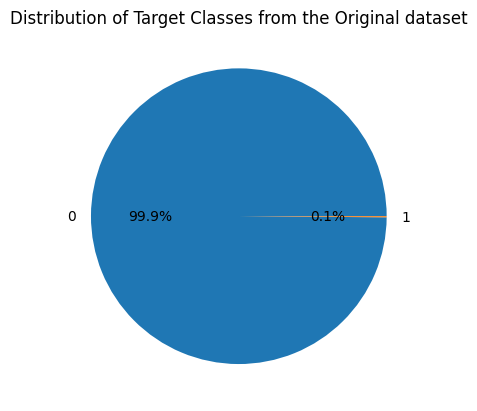

In [1941]:
# Counting the frequency of classes in the target variable - Original dataset
class_counts = df_bankdata_encoded['is_fraud'].value_counts()

# Creating a pie chart to display the frequencies of classes in the target variable
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')

# Adding title
plt.title('Distribution of Target Classes from the Original dataset')

# Displaying the plot
plt.show()

From the above results, it is clear that a significant portion of the total observations belongs to one target class, labelled as non-fraudulent transactions represented by the value 0. So, the bank's transaction dataset shows a high level of class imbalance.

**• Splitting the bank dataset into data - 80% and test - 20%**

In [1942]:
# Splitting the bank data into two separate datasets - data with 80% and test with 20%
df_data, df_test = train_test_split(df_bankdata_encoded, test_size=0.2, random_state=19)

• Checking the frequency rates of classes of the target variable from the Testing dataset

In [1943]:
# Checking the quantity of classes of the target variable - Testing dataset
df_test['is_fraud'].value_counts()

0    851240
1       941
Name: is_fraud, dtype: int64

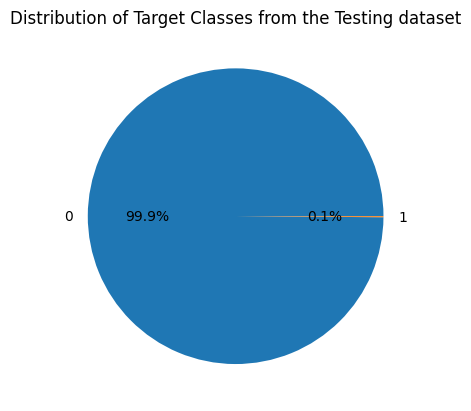

In [1944]:
# Counting the frequency of classes in the target variable - Testing dataset
class_counts = df_test['is_fraud'].value_counts()

# Creating a pie chart to display the frequencies of classes in the target variable
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')

# Adding title
plt.title('Distribution of Target Classes from the Testing dataset')

# Displaying the plot
plt.show()

Maintaining the identical class distribution of the target variable as the original data in the testing dataset.

**• Performing undersampling on the dataset**

In [1945]:
# Undersmapling the dataset to have equal classes of the target variable
df_sampled = df_data.groupby('is_fraud').sample(df_data[df_data['is_fraud'] == 1].count()['is_fraud'])

• Checking the frequency rates of classes of the target variable from the Sampled dataset

In [1946]:
# Checking the quantity of classes of the target variable  - Sampled dataset
df_sampled['is_fraud'].value_counts()

0    4093
1    4093
Name: is_fraud, dtype: int64

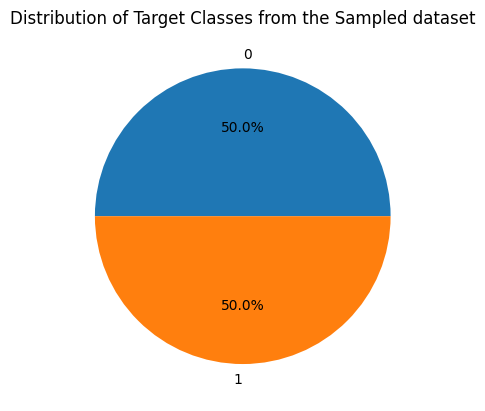

In [1947]:
# Counting the frequency of classes in the target variable - Sampled dataset
class_counts = df_sampled['is_fraud'].value_counts()

# Creating a pie chart to display the frequencies of classes in the target variable
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')

# Adding title
plt.title('Distribution of Target Classes from the Sampled dataset')

# Displaying the plot
plt.show()

Due to the significant class imbalance in the dataset, undersampling was performed to achieve an equal distribution of target classes when developing the models.

• Selecting Target Variable and Features

In [1948]:
# Extracting the target variable 'is_fraud' into 'y_test' variable
y_test = df_test.pop('is_fraud')

# Creating 'X_test' variable with all the test features
X_test = df_test

In [1949]:
# Extracting the target variable 'is_fraud' into 'y' variable
y = df_sampled.pop('is_fraud')

# Creating 'X' variable with all the features
X = df_sampled

**• Splitting the sampled dataset into train - 80% and validation - 20%**

In [1950]:
# Splitting the sampled dataset into two separate datasets - training with 80% and validation with 20%
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=19, stratify=y)

Creating a validation set provides the opportunity to perform multiple experiments as the model can be tested on this set repeatedly. Therefore, splitting the sampled data into training set and a validation set with a ratio of 80:20, to leverage more flexibility for experimentation.

• Checking the frequency rates of classes of the target variable from the training and validation dataset

In [1951]:
# Checking the quantity of classes of the target variable - Training dataset
y_train.value_counts(normalize=True)

1    0.5
0    0.5
Name: is_fraud, dtype: float64

In [1952]:
# Checking the quantity of classes of the target variable - Validation dataset
y_validate.value_counts(normalize=True)

0    0.5
1    0.5
Name: is_fraud, dtype: float64

#### 3.5] Features Scaling

In [1953]:
# Instantiating the object of the StandardScaler class
scaler = StandardScaler()

# Fitting the object to the training dataset
scaler.fit(X_train)

# Transforming and replacing the features data from all the sets
X_train = scaler.transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

Applying scaling to all the features to standardize their values to a uniform level. This allows the model to effectively use all the information from the features to learn generalised patterns, identify fraudulent behaviour and make accurate classifications.

And, to perform the scaling, StandardScaler technique is selected because it preserves the original shape of the data distribution.

### 4. Modelling 

#### 4.1] Assessing Baseline Performance

In [1954]:
# Calculating the mode of the target variable
y_mode = y_train.mode()[0]

# Creating the array of the same dimensions as the training set with the above mode value
y_base = np.full(y_train.shape, y_mode)

# Displaying the f1 scores of this baseline model
print('Baseline Performance - Null Accuracy:') 
print('F1 Score:', f1_score(y_train, y_base, average='weighted'))

Baseline Performance - Null Accuracy:
F1 Score: 0.3333333333333333


Calculating baseline performance also known as null accuracy that acts as the simplest model that always predicts the same baseline value which helps to compare the performance of the trained classification models, ensuring that we are making progress in the right direction.

#### 4.2] Training Classification Models

##### Classification Models
Given that the target variable comprises two classes, with 0, indicating a non-fraudulent transaction, and 1, indicating a fraudulent transaction, employing a classification model is the suitable technique as our objective is to classify transactions within these two specific classes. 

Performing various experiments with XGBoost (eXtreme Gradient Boosting), Random Forest, and Neural Network models to assess their performance and identify the best model that can most effectively classify fraudulent and non-fraudulent transactions.

##### Performance Metrics
To evaluate the model's performance using following performance metrics.

   - Precision

   - Recall

   - Weighted F1 Score

   - Binary F1 Score

   - Confusion Matrix

Precision, Recall, and F1 Score are employed because they provide different insights into the model's performance, enabling a comprehensive understanding of various aspects of the classification use case. The binary F1 score is used to evaluate the performance specifically for classes that have positive labels.

The aim of the model is to not only achieve high performance but also prioritize minimizing false negatives i.e., incorrectly classifying a fraudulent transaction as legitimate to ensure that potentially fraudulent activities are not overlooked. 

Therefore, Confusion Matrix is used which informs valuable false negatives error along with how well the model is performing in terms of its ability to correctly predict the positive and negative classes.

##### **A] XGBoost (eXtreme Gradient Boosting) - Experiment 1**

In [1955]:
# Defining the parameter distributions to search over
hyperparams_dict = {'learning_rate': uniform(0.01, 0.5),
                    'max_depth': randint(3, 15),
                    'subsample': uniform(0.6, 0.4),
                    'colsample_bytree': uniform(0.6, 0.4),
                    'reg_alpha': uniform(0, 0.5),
                    'reg_lambda': uniform(0, 0.5),
                    'min_child_weight': randint(1, 6),
                    'gamma': uniform(0, 0.5),}

• Instantiating the XGBoost Classifier object

In [1956]:
# Creating a object of the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Performing random search
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=hyperparams_dict, scoring='f1', cv=5, n_iter=10, random_state=19)

Cross-validation and Randomised search techniques are used to find the best combination of hyperparameters for the classification task.

• Fitting the XGBoost Classifier model with the training and validation data

In [1957]:
# Combining the training and validation sets
X_merged = np.concatenate((X_train, X_validate), axis=0)
y_merged = np.concatenate((y_train, y_validate), axis=0)

# Training the XGBoost model
random_search.fit(X_merged, y_merged)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c01d4310>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c01d5f30>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c01d5600>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f2252b30>},
                   random_state=19, scoring='f1')

• Checking the performance metrics for the training and validation set

In [1958]:
# Displaying the best parameters and best score
print("Best Parameters for XGBoost classifier:", random_search.best_params_)
print("Best Score for XGBoost classifier:", random_search.best_score_)

Best Parameters for XGBoost classifier: {'colsample_bytree': 0.7371112616412909, 'gamma': 0.1671557643471569, 'learning_rate': 0.11210772123585254, 'max_depth': 13, 'min_child_weight': 3, 'reg_alpha': 0.1991221346346434, 'reg_lambda': 0.0501837469425232, 'subsample': 0.6731619435532209}
Best Score for XGBoost classifier: 0.9328716508450053


### 5. Model Evaluation

#### 5.1] Analysing Model Performance

• Checking the performance of the model on the testing set

In [1959]:
# Predicting the target classes for testing set 
y_test_predicts = random_search.predict(X_test)

# Checking the performance metrics for the testing set
print('Performance Score of the Training Set:') 
print('Precision Score:', precision_score(y_test, y_test_predicts))
print('Recall Score:', recall_score(y_test, y_test_predicts))
print('F1 Score:', f1_score(y_test, y_test_predicts, average='weighted'))
print('binary F1 Score:', f1_score(y_test, y_test_predicts, average='binary'))

Performance Score of the Training Set:
Precision Score: 0.01564622250445397
Recall Score: 0.9426142401700319
F1 Score: 0.9650466624519467
binary F1 Score: 0.03078151027207107


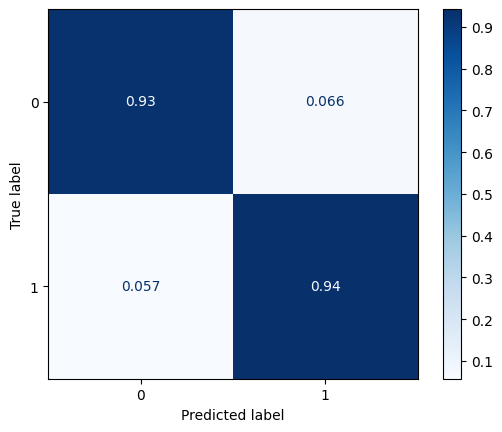

In [1960]:
# Displaying confusion matrix for testing set
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicts, normalize='true', cmap='Blues')

##### **B] Random Forest Classifier - Experiment 2**

• Instantiating the RandomForest Classifier object

In [1961]:
# Creating a object of the RandomForest classifier class 
rf_model = RandomForestClassifier(n_estimators=91, max_depth=9, min_samples_leaf=13, class_weight='balanced', criterion='entropy',  max_features='log2', random_state=19)

• Fitting the RandomForest Classifier model with the training data

In [1962]:
# Training the RandomForest classifier model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features='log2', min_samples_leaf=13,
                       n_estimators=91, random_state=19)

• Predicting the results for training set

In [1963]:
# Predicting the target classes for training set 
y_train_predicts = rf_model.predict(X_train)

• Checking the performance metrics for the training set

In [1964]:
# Checking the performance metrics for the training set
print('Performance Score of the Training Set:') 
print('Precision Score:', precision_score(y_train, y_train_predicts))
print('Recall Score:', recall_score(y_train, y_train_predicts))
print('F1 Score:', f1_score(y_train, y_train_predicts, average='weighted'))
print('binary F1 Score:', f1_score(y_train, y_train_predicts, average='binary'))

Performance Score of the Training Set:
Precision Score: 0.9632508833922262
Recall Score: 0.8326206475259621
F1 Score: 0.8999676844684507
binary F1 Score: 0.8931847968545216


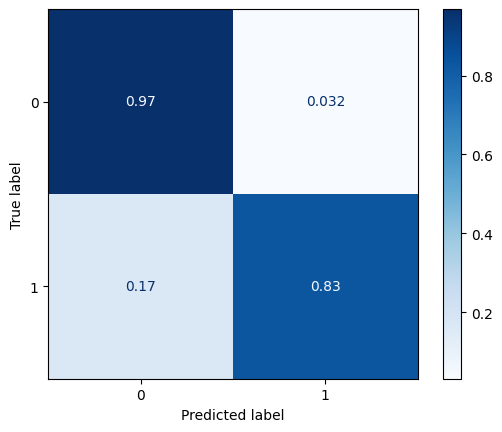

In [1965]:
# Displaying confusion matrix for training set
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predicts, normalize='true', cmap='Blues')

• Checking the performance metrics for the validation set

In [1966]:
# Predicting the target classes for validation set 
y_validate_predicts = rf_model.predict(X_validate)

In [1967]:
# Checking the performance metrics for the validation set
print('Performance Score of the Validation Set:') 
print('Precision Score:', precision_score(y_validate, y_validate_predicts))
print('Recall Score:', recall_score(y_validate, y_validate_predicts))
print('F1 Score:', f1_score(y_validate, y_validate_predicts, average='weighted'))
print('binary F1 Score:', f1_score(y_train, y_train_predicts, average='binary'))

Performance Score of the Validation Set:
Precision Score: 0.9653179190751445
Recall Score: 0.8156288156288156
F1 Score: 0.8925162594233413
binary F1 Score: 0.8931847968545216


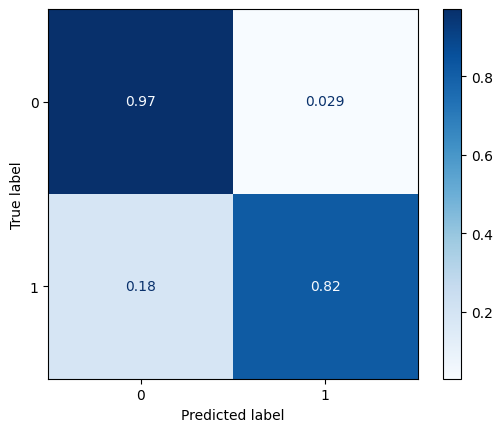

In [1968]:
# Displaying confusion matrix for validation set
ConfusionMatrixDisplay.from_predictions(y_validate, y_validate_predicts, normalize='true', cmap='Blues')

### 5. Model Evaluation

#### 5.1] Analysing Model Performance

• Checking the performance of the model on the testing set

In [1969]:
# Predicting the target classes for testing set 
y_test_predicts = rf_model.predict(X_test)

# Checking the performance metrics for the testing set
print('Performance Score of the Training Set:') 
print('Precision Score:', precision_score(y_test, y_test_predicts))
print('Recall Score:', recall_score(y_test, y_test_predicts))
print('F1 Score:', f1_score(y_test, y_test_predicts, average='weighted'))
print('binary F1 Score:', f1_score(y_test, y_test_predicts, average='binary'))

Performance Score of the Training Set:
Precision Score: 0.02570763469518572
Recall Score: 0.8097768331562167
F1 Score: 0.9816092672385254
binary F1 Score: 0.04983323523641358


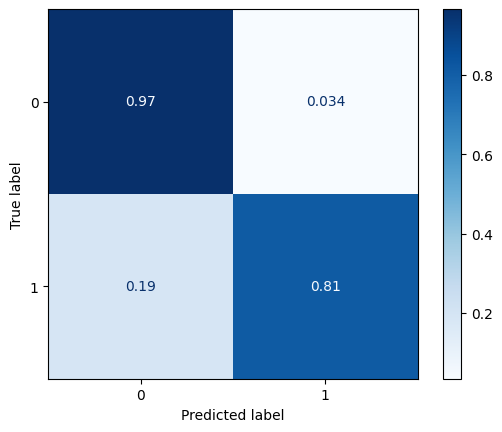

In [1970]:
# Displaying confusion matrix for testing set
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicts, normalize='true', cmap='Blues')

##### Results

-	The weighted F1 score on the training of 89% and validation of 89% indicates that the model with Random Forest is performing consistently, while on the unseen testing data with the same high imbalanced target classes distribution as the original data, it results in 98% indicating that the model is capturing important patterns and generalised enough to identify potential fraudulent and legitimate transactions from unseen data. 

-	The binary F1 score denoting the classifications that belong to the positive class is identical at 89% for the training and validation set, while for testing its 0.0498% which might be due to the presence of a huge imbalance of target classes. 

-	The Recall score of 83% on training, 81% on validation and 80% on testing sets are decent indicating that the model correctly predicted fraudulent transactions i.e., above 80% across all the sets, out of all the actual fraudulent transactions. A high recall is important as the cost of false negatives, such as failing to identify fraudulent transactions, is significant, and it is crucial to detect and prevent as many fraudulent activities as possible.
 
-	The rate of False Negative errors, such as flagging fraudulent transactions as legitimate from the confusion matrix shows 17% for the training, 18% for the validation and 19% for the testing set which is relatively consistent. 

-	The rate of False Positive errors, which involves classifying legitimate transactions as fraudulent, is consistently low and remains stable throughout the different datasets with 0.032% for the training set, 0.029% for the validation set, and 0.034% for the testing set.


#### **Feature Importance**

• Checking the contribution of each feature to predictions of target classes

In [2020]:
# Creating a dataframe to extract the feature names
feature_names = pd.DataFrame(df_sampled)

# Creating a pandas dataframe with names of all the features and their corresponding feature importance values
df_rf_feature_imporance = pd.DataFrame({'Feature_Name': feature_names.columns, 'Feature_Importance_Rate': rf_model.feature_importances_})

# Displaying a chart to visualizes the feature importance rates for each feature
alt.Chart(df_rf_feature_imporance).mark_bar().encode(x='Feature_Importance_Rate', y=alt.Y('Feature_Name', sort='-x'), tooltip=['Feature_Name','Feature_Importance_Rate']) 

alt.Chart(...)

##### Results

- Extracting the feature importance measure, that provide valuable insights into the features and helps in understanding which features are making the most significant contributions to the model's predictions.

- The above bar graph illustrates that the least contributing features are related to some of the values of the transaction's category namely 'category_travel', 'category_health_fitness', 'category_misc_pos', and 'category_grocery_net'.

- The rest of the features are contributing the most to the prediction of target classes and their feature's importance rate ranges between 0.73% to 0.01%. 

- Therefore, in the next experiments, using these Feature Importance information to verify if the model's generalized performance could be enhanced. 

• Removing features that are least contributing the model prediction of target classes

In [2021]:
# Creating the copy of the dataframe
df_bankdata_encoded_copy = df_bankdata_encoded.copy()

# Creating a list of features that are least contributing the model prediction of target classes
least_important_features = [ 'category_travel', 'category_health_fitness', 'category_misc_pos', 'category_grocery_net']

# Removing features that are least contributing the model prediction of target classes
df_bankdata_encoded_copy = df_bankdata_encoded_copy.drop(least_important_features, axis=1)

In [2022]:
# Checking the features names that are contributing to the prediction of target classes
df_bankdata_encoded_copy.columns

Index(['is_fraud', 'amt', 'age', 'month', 'day', 'distance_km', 'job_index',
       'merchant_index', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_pos', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos'],
      dtype='object')

• Splitting the bank dataset into data - 80% and testing - 20%

In [2023]:
# Splitting the bank data into two separate datasets - data with 80% and test with 20%
df_data_ifeature, df_test_ifeature = train_test_split(df_bankdata_encoded_copy, test_size=0.2, random_state=19)

• Performing undersampling on the data set

In [2024]:
# Undersmapling the dataset to have equal classes of the target variable
df_sampled_ifeature = df_data_ifeature.groupby('is_fraud').sample(df_data_ifeature[df_data_ifeature['is_fraud'] == 1].count()['is_fraud'])

• Selecting Target Variable and Features

In [2025]:
# Extracting the target variable 'is_fraud' into 'y_test' variable
y_test_ifeatures = df_test_ifeature.pop('is_fraud')

# Creating 'X_test' variable with all the test features
X_test_ifeatures = df_test_ifeature

In [2026]:
# Extracting the target variable 'is_fraud' into 'y_test' variable
y_ifeatures = df_sampled_ifeature.pop('is_fraud')

# Creating 'X_test' variable with all the test features
X_ifeatures = df_sampled_ifeature

In [2027]:
# Checking the frequencies of classes of the target variable - Testing dataset
y_test_ifeatures.value_counts(normalize=True)

0    0.998896
1    0.001104
Name: is_fraud, dtype: float64

In [2028]:
# Checking the frequencies of classes of the target variable - Sampled dataset
y_ifeatures.value_counts(normalize=True)

0    0.5
1    0.5
Name: is_fraud, dtype: float64

• Splitting the sampled dataset into train - 80% and validation - 20%

In [2029]:
# Splitting the sampled dataset into two separate datasets - training with 80% and validation with 20%
X_train_ifeatures, X_validate_ifeatures, y_train_ifeatures, y_validate_ifeatures = train_test_split(X_ifeatures, y_ifeatures, test_size=0.2, random_state=19, stratify=y_ifeatures)

• Features Scaling

In [2030]:
# Instantiating the object of the StandardScaler class
scaler = StandardScaler()

# Fitting the object to the training dataset 
scaler.fit(X_train_ifeatures)

# Transforming and replacing the features data from all the sets
X_train_ifeatures = scaler.transform(X_train_ifeatures)
X_validate_ifeatures = scaler.transform(X_validate_ifeatures)
X_test_ifeatures = scaler.transform(X_test_ifeatures)

**•  Performing Hyperparameter Tuning**

In [1982]:
# Defining the parameter distributions to search over
hyperparams_dict = {'n_estimators': randint(1, 200),
                    'max_depth': randint(1, 20),
                    'min_samples_leaf': randint(3, 20),
                    'class_weight': ['balanced'],
                    'criterion': ['gini', 'entropy'],
                    'max_features': ['sqrt', 'log2']}

In [1983]:
# Creating a object of RandomForest class
rf_model1 = RandomForestClassifier()

# Creating a object of StratifiedKFold class for cross-validation
stf_cv = StratifiedKFold(n_splits=5)

# Creating a object of RandomizedSearchCV class 
rf_random_search = RandomizedSearchCV(rf_model1, hyperparams_dict, cv=stf_cv, verbose=1, random_state=19)

# Combining the training and validation sets
X_merged_ifeatures = np.concatenate((X_train_ifeatures, X_validate_ifeatures), axis=0)
y_merged_ifeatures = np.concatenate((y_train_ifeatures, y_validate_ifeatures), axis=0)

# Training the RandomForest classifier with hyperparameters
rf_random_search.fit(X_merged_ifeatures, y_merged_ifeatures)

# Displaying the best parameters and best score
print("Best Parameters for Random Forest classifier:", rf_random_search.best_params_)
print("Best Score for Random Forest classifier:", rf_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Random Forest classifier: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 169}
Best Score for Random Forest classifier: 0.9220618585920969


##### **C] Random Forest Classifier with Important Features - Experiment 3**

In [2031]:
# Creating a object of the RandomForest classifier class 
rf_model2 = RandomForestClassifier(n_estimators=169, max_depth=15, min_samples_leaf=5, class_weight='balanced', criterion='entropy',  max_features='log2', random_state=19)

In [2032]:
# Training the RandomForest classifier model
rf_model2.fit(X_train_ifeatures, y_train_ifeatures)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features='log2', min_samples_leaf=5,
                       n_estimators=169, random_state=19)

In [2033]:
# Predicting the target classes for training set 
y_train_ifpredicts = rf_model2.predict(X_train_ifeatures)

• Checking the performance metrics for the training set

In [2034]:
# Checking the performance metrics for the training set
print('Performance Score of the Training Set:') 
print('Precision Score:', precision_score(y_train_ifeatures, y_train_ifpredicts))
print('Recall Score:', recall_score(y_train_ifeatures, y_train_ifpredicts))
print('F1 Score:', f1_score(y_train_ifeatures, y_train_ifpredicts, average='weighted'))
print('binary F1 Score:', f1_score(y_train_ifeatures, y_train_ifpredicts, average='binary'))

Performance Score of the Training Set:
Precision Score: 0.9688888888888889
Recall Score: 0.9321930360415394
F1 Score: 0.951112584403212
binary F1 Score: 0.950186799501868


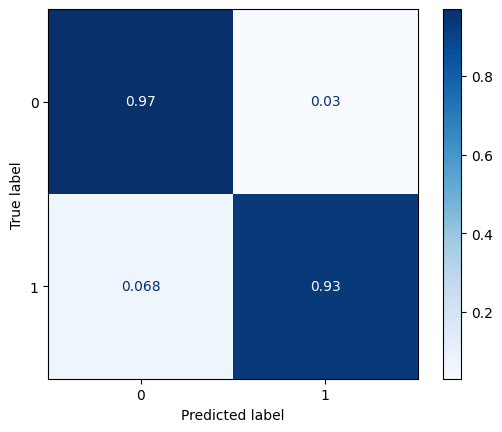

In [2035]:
# Displaying confusion matrix for training set
ConfusionMatrixDisplay.from_predictions(y_train_ifeatures, y_train_ifpredicts, normalize='true', cmap='Blues')

• Checking the performance metrics for the validation set

In [2036]:
# Predicting the target classes for validation set 
y_validate_ifpredicts = rf_model2.predict(X_validate_ifeatures)

In [2037]:
# Checking the performance metrics for the validation set
print('Performance Score of the Validation Set:') 
print('Precision Score:', precision_score(y_validate_ifeatures, y_validate_ifpredicts))
print('Recall Score:', recall_score(y_validate_ifeatures, y_validate_ifpredicts))
print('F1 Score:', f1_score(y_validate_ifeatures, y_validate_ifpredicts, average='weighted'))
print('binary F1 Score:', f1_score(y_validate_ifeatures, y_validate_ifpredicts, average='binary'))

Performance Score of the Validation Set:
Precision Score: 0.941952506596306
Recall Score: 0.8717948717948718
F1 Score: 0.9089090788979155
binary F1 Score: 0.9055168040583386


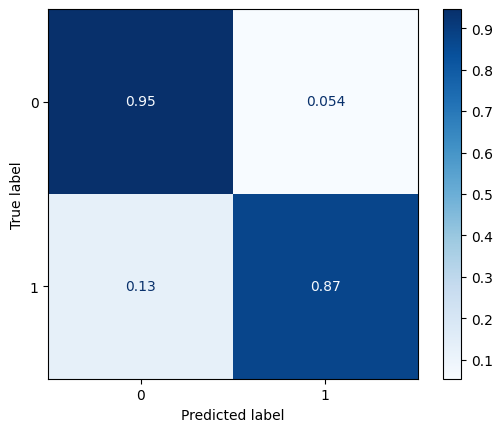

In [2038]:
# Displaying confusion matrix for validation set
ConfusionMatrixDisplay.from_predictions(y_validate_ifeatures, y_validate_ifpredicts, normalize='true', cmap='Blues')

### 5. Model Evaluation

#### 5.1] Analysing Model Performance

• Checking the performance of the model on the testing set

In [2039]:
# Predicting the target classes for testing set 
y_test_ifpredicts = rf_model2.predict(X_test_ifeatures)

# Checking the performance metrics for the testing set
print('Performance Score of the Training Set:') 
print('Precision Score:', precision_score(y_test_ifeatures, y_test_ifpredicts))
print('Recall Score:', recall_score(y_test_ifeatures, y_test_ifpredicts))
print('F1 Score:', f1_score(y_test_ifeatures, y_test_ifpredicts, average='weighted'))
print('binary F1 Score:', f1_score(y_test_ifeatures, y_test_ifpredicts, average='binary'))

Performance Score of the Training Set:
Precision Score: 0.020645804762498443
Recall Score: 0.8799149840595112
F1 Score: 0.9752848647736501
binary F1 Score: 0.040344978804268385


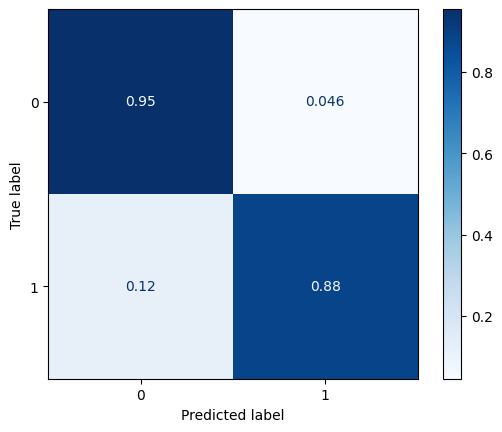

In [2040]:
# Displaying confusion matrix for testing set
ConfusionMatrixDisplay.from_predictions(y_test_ifeatures, y_test_ifpredicts, normalize='true', cmap='Blues')

##### Results

-	With a weighted F1 score of 95% on the training, 90% on the validation and 97% on the testing set, the Random Forest model trained with important features demonstrates relatively consistent performance suggesting that the model has a strong ability to generalize and effectively identify potentially fraudulent activities on unseen data.

-	The binary F1 score for classifying positive class instances is 95% for training and 90% for validation. However, the score drops significantly to 0.0403% for testing, potentially due to a significant imbalance in the target classes.

-	The Recall score of 93% on training is slightly higher than the 87% on validation and testing sets, which indicates that the model correctly identified a higher proportion of fraudulent transactions compared to the classification model from the 2nd experiment. This performance was consistent across all sets, with the model correctly predicting over 87% of actual fraudulent transactions.

-	However, from the confusion matrix, the rate of False Negative errors, with 0.068% for training, 13% for validation and 12% for testing illustrates the overfitting nature of the model indicating that the model is misclassifying a significant amount of fraudulent transactions as legitimate which might lead to financial losses and loss in customer’s trust.

-	The rate of False Positive errors, which resulted in 0.03% for training, 0.054% for validation and 0.046% for the testing set is not consistent which represents misclassifying legitimate transactions as fraudulent.

##### **D] MLPClassifier Neural Networks - Experiment 4**

• Defining Architecture

In [2067]:
# Creating a list that holds the hidden layer=256
hidden_layers = [256]

# Creating a variable that holds the batch_size=32
batch_size = 32

# Creating a variable that holds the hidden_activation=relu
hidden_activation = 'relu'

# Creating a variable that holds the solver_algo=adam
solver_algo = 'adam'

# Creating a variable that holds the learning rate=constant
lr = 'constant'

# Creating a variable that holds the lr_init=0.001
lr_init = 0.001

# Creating a variable that holds the epochs=10
epochs = 10

• Instantiating the MLPClassifier with the hyperparameters

In [2068]:
# Creating the object of MLPClassifier with above defined hyperparameters
binary_class_nn = MLPClassifier(hidden_layer_sizes=hidden_layers, batch_size=batch_size,
                                activation=hidden_activation, solver=solver_algo,  
                                learning_rate = lr, learning_rate_init=lr_init,
                                max_iter=epochs, random_state=19).fit(X_train_ifeatures, y_train_ifeatures)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


• Checking the performance metrics for the training set

In [2069]:
# Predicting the target classes for training set 
y_train_ifpredicts = binary_class_nn.predict(X_train_ifeatures)

# Checking the performance metrics for the training set
print('Performance Score of the Training Set:') 
print('Precision Score:', precision_score(y_train_ifeatures, y_train_ifpredicts))
print('Recall Score:', recall_score(y_train_ifeatures, y_train_ifpredicts))
print('F1 Score:', f1_score(y_train_ifeatures, y_train_ifpredicts, average='weighted'))
print('binary F1 Score:', f1_score(y_train_ifeatures, y_train_ifpredicts, average='binary'))

Performance Score of the Training Set:
Precision Score: 0.9164948453608247
Recall Score: 0.8145998778252902
F1 Score: 0.8697869876263716
binary F1 Score: 0.8625485122897801


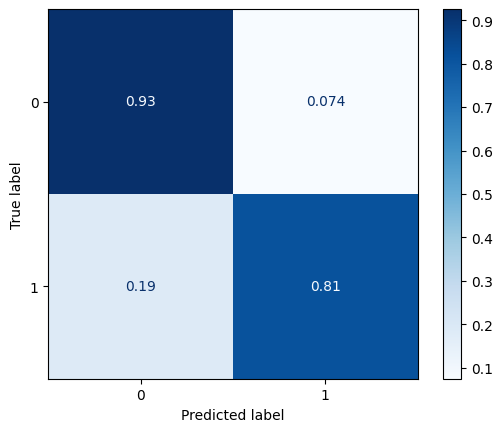

In [2070]:
# Displaying confusion matrix for training set
ConfusionMatrixDisplay.from_predictions(y_train_ifeatures, y_train_ifpredicts, normalize='true', cmap='Blues')

• Checking the performance metrics for the validation set

In [2071]:
# Predicting the target classes for validation set 
y_validate_ifpredicts = binary_class_nn.predict(X_validate_ifeatures)

# Checking the performance metrics for the validation set
print('Performance Score of the Validation Set:') 
print('Precision Score:', precision_score(y_validate_ifeatures, y_validate_ifpredicts))
print('Recall Score:', recall_score(y_validate_ifeatures, y_validate_ifpredicts))
print('F1 Score:', f1_score(y_validate_ifeatures, y_validate_ifpredicts, average='weighted'))
print('binary F1 Score:', f1_score(y_validate_ifeatures, y_validate_ifpredicts, average='binary'))

Performance Score of the Validation Set:
Precision Score: 0.9101123595505618
Recall Score: 0.7912087912087912
F1 Score: 0.855917532410414
binary F1 Score: 0.8465055519268452


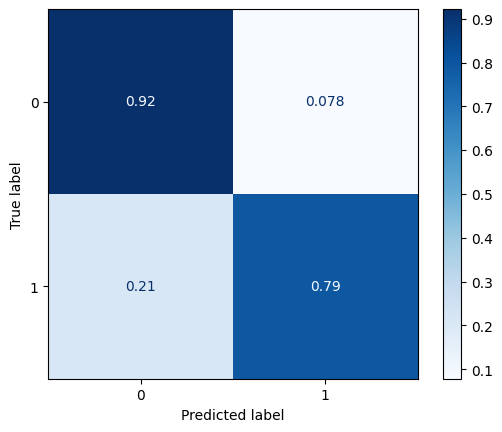

In [2072]:
# Displaying confusion matrix for validation set
ConfusionMatrixDisplay.from_predictions(y_validate_ifeatures, y_validate_ifpredicts, normalize='true', cmap='Blues')

• Changing the value of the hyperparameter

In [2073]:
# Changing the value of lr_init = 0.01
lr_init = 0.01

In [2074]:
# Creating the object of MLPClassifier with above defined hyperparameters
binary_class_nn1 = MLPClassifier(hidden_layer_sizes=hidden_layers, batch_size=batch_size,
                   activation=hidden_activation, solver=solver_algo,  
                   learning_rate = lr, learning_rate_init=lr_init,
                   max_iter=epochs, random_state=19).fit(X_train_ifeatures, y_train_ifeatures)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


• Checking the performance metrics for the training set

In [2075]:
# Predicting the target classes for training set 
y_train_ifpredicts = binary_class_nn1.predict(X_train_ifeatures)

# Checking the performance metrics for the training set
print('Performance Score of the Training Set:') 
print('Precision Score:', precision_score(y_train_ifeatures, y_train_ifpredicts))
print('Recall Score:', recall_score(y_train_ifeatures, y_train_ifpredicts))
print('F1 Score:', f1_score(y_train_ifeatures, y_train_ifpredicts, average='weighted'))
print('binary F1 Score:', f1_score(y_train_ifeatures, y_train_ifpredicts, average='binary'))


Performance Score of the Training Set:
Precision Score: 0.9401238816242258
Recall Score: 0.8344532681734881
F1 Score: 0.8903071719627673
binary F1 Score: 0.8841423948220065


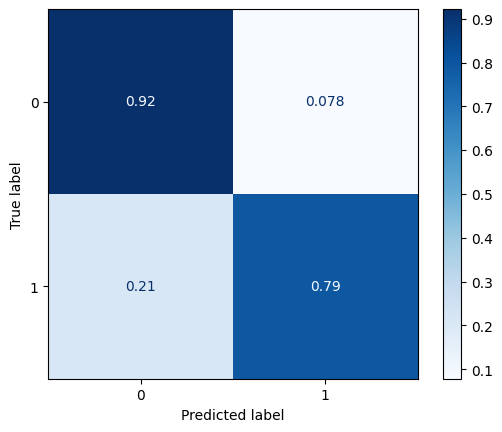

In [2076]:
# Displaying confusion matrix for validation set
ConfusionMatrixDisplay.from_predictions(y_validate_ifeatures, y_validate_ifpredicts, normalize='true', cmap='Blues')

• Checking the performance metrics for the validation set

In [2077]:
# Predicting the target classes for validation set 
y_validate_ifpredicts = binary_class_nn1.predict(X_validate_ifeatures)

# Checking the performance metrics for the validation set
print('Performance Score of the Validation Set:') 
print('Precision Score:', precision_score(y_validate_ifeatures, y_validate_ifpredicts))
print('Recall Score:', recall_score(y_validate_ifeatures, y_validate_ifpredicts))
print('F1 Score:', f1_score(y_validate_ifeatures, y_validate_ifpredicts, average='weighted'))
print('binary F1 Score:', f1_score(y_validate_ifeatures, y_validate_ifpredicts, average='binary'))

Performance Score of the Validation Set:
Precision Score: 0.921015514809591
Recall Score: 0.7973137973137974
F1 Score: 0.8638548767776487
binary F1 Score: 0.8547120418848169


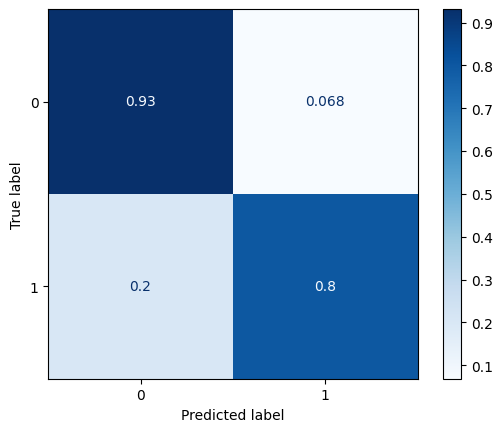

In [2078]:
# Displaying confusion matrix for validation set
ConfusionMatrixDisplay.from_predictions(y_validate_ifeatures, y_validate_ifpredicts, normalize='true', cmap='Blues')

• Changing the value of the hyperparameter

In [2079]:
# Changing the value of hidden_layers = [512]
hidden_layers = [512]

In [2080]:
# Creating the object of MLPClassifier with above defined hyperparameters
binary_class_nn2 = MLPClassifier(hidden_layer_sizes=hidden_layers, batch_size=batch_size,
                   activation=hidden_activation, solver=solver_algo,  
                   learning_rate = lr, learning_rate_init=lr_init,
                   max_iter=epochs, random_state=19).fit(X_train_ifeatures, y_train_ifeatures)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


• Checking the performance metrics for the training set

In [2081]:
# Predicting the target classes for training set 
y_train_ifpredicts = binary_class_nn2.predict(X_train_ifeatures)

# Checking the performance metrics for the training set
print('Performance Score of the Training Set:') 
print('Precision Score:', precision_score(y_train_ifeatures, y_train_ifpredicts))
print('Recall Score:', recall_score(y_train_ifeatures, y_train_ifpredicts))
print('F1 Score:', f1_score(y_train_ifeatures, y_train_ifpredicts, average='weighted'))
print('binary F1 Score:', f1_score(y_train_ifeatures, y_train_ifpredicts, average='binary'))

Performance Score of the Training Set:
Precision Score: 0.9420541290770298
Recall Score: 0.8292608430054978
F1 Score: 0.8887276628972367
binary F1 Score: 0.8820662768031189


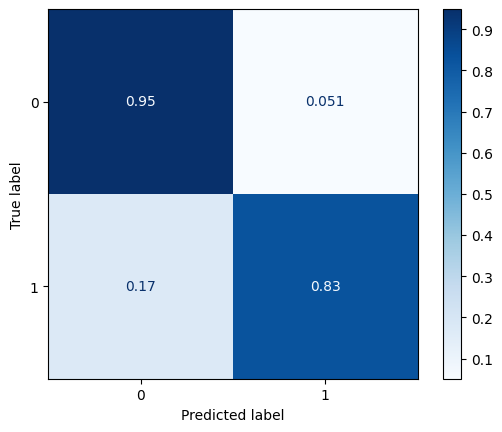

In [2082]:
# Displaying confusion matrix for training set
ConfusionMatrixDisplay.from_predictions(y_train_ifeatures, y_train_ifpredicts, normalize='true', cmap='Blues')

• Checking the performance metrics for the validation set

In [2083]:
# Predicting the target classes for validation set 
y_validate_ifpredicts = binary_class_nn2.predict(X_validate_ifeatures)

# Checking the performance metrics for the validation set
print('Performance Score of the Validation Set:') 
print('Precision Score:', precision_score(y_validate_ifeatures, y_validate_ifpredicts))
print('Recall Score:', recall_score(y_validate_ifeatures, y_validate_ifpredicts))
print('F1 Score:', f1_score(y_validate_ifeatures, y_validate_ifpredicts, average='weighted'))
print('binary F1 Score:', f1_score(y_validate_ifeatures, y_validate_ifpredicts, average='binary'))

Performance Score of the Validation Set:
Precision Score: 0.9256080114449213
Recall Score: 0.78998778998779
F1 Score: 0.8625099488729108
binary F1 Score: 0.8524374176548088


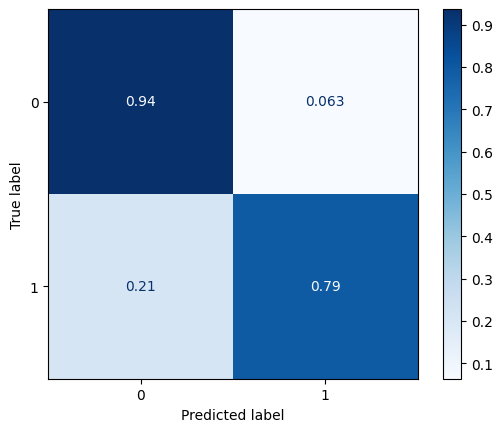

In [2084]:
# Displaying confusion matrix for validation set
ConfusionMatrixDisplay.from_predictions(y_validate_ifeatures, y_validate_ifpredicts, normalize='true', cmap='Blues')

• Changing the value of the hyperparameter

In [2085]:
# Changing the value of epochs = 15
lr_init = 0.0001

In [2086]:
# Creating the object of MLPClassifier with above defined hyperparameters
binary_class_nn3 = MLPClassifier(hidden_layer_sizes=hidden_layers, batch_size=batch_size,
                   activation=hidden_activation, solver=solver_algo,  
                   learning_rate = lr, learning_rate_init=lr_init,
                   max_iter=epochs, random_state=19).fit(X_train_ifeatures, y_train_ifeatures)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


• Checking the performance metrics for the training set

In [2087]:
# Predicting the target classes for training set 
y_train_ifpredicts = binary_class_nn3.predict(X_train_ifeatures)

# Checking the performance metrics for the training set
print('Performance Score of the Training Set:') 
print('Precision Score:', precision_score(y_train_ifeatures, y_train_ifpredicts))
print('Recall Score:', recall_score(y_train_ifeatures, y_train_ifpredicts))
print('F1 Score:', f1_score(y_train_ifeatures, y_train_ifpredicts, average='weighted'))
print('binary F1 Score:', f1_score(y_train_ifeatures, y_train_ifpredicts, average='binary'))

Performance Score of the Training Set:
Precision Score: 0.9147788565264293
Recall Score: 0.7770311545510079
F1 Score: 0.8514794143679623
binary F1 Score: 0.8402972749793559


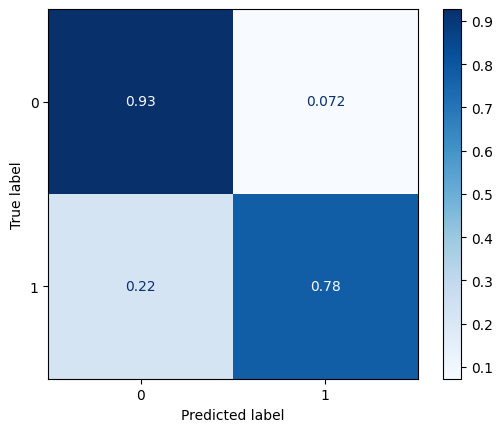

In [2088]:
# Displaying confusion matrix for training set
ConfusionMatrixDisplay.from_predictions(y_train_ifeatures, y_train_ifpredicts, normalize='true', cmap='Blues')

• Checking the performance metrics for the validation set

In [2089]:
# Predicting the target classes for validation set 
y_validate_ifpredicts = binary_class_nn3.predict(X_validate_ifeatures)

# Checking the performance metrics for the validation set
print('Performance Score of the Validation Set:') 
print('Precision Score:', precision_score(y_validate_ifeatures, y_validate_ifpredicts))
print('Recall Score:', recall_score(y_validate_ifeatures, y_validate_ifpredicts))
print('F1 Score:', f1_score(y_validate_ifeatures, y_validate_ifpredicts, average='weighted'))
print('binary F1 Score:', f1_score(y_validate_ifeatures, y_validate_ifpredicts, average='binary'))

Performance Score of the Validation Set:
Precision Score: 0.9158050221565731
Recall Score: 0.757020757020757
F1 Score: 0.8425283903142462
binary F1 Score: 0.8288770053475936


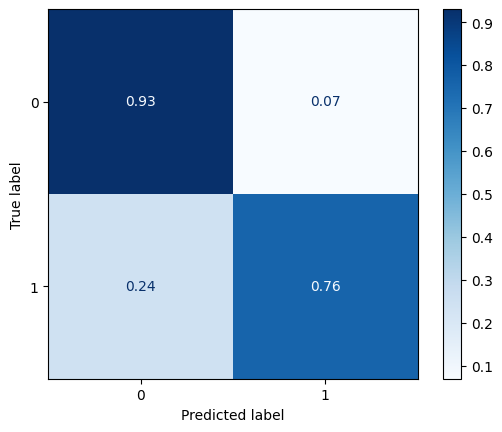

In [2090]:
# Displaying confusion matrix for validation set
ConfusionMatrixDisplay.from_predictions(y_validate_ifeatures, y_validate_ifpredicts, normalize='true', cmap='Blues')

### 5. Model Evaluation

#### 5.1] Analysing Model Performance

• Checking the performance of the model on the testing set

In [2093]:
# Predicting the target classes for testing set 
y_test_ifpredicts = binary_class_nn.predict(X_test_ifeatures)

# Checking the performance metrics for the testing set
print('Performance Score of the Testing Set:') 
print('Precision Score:', precision_score(y_test_ifeatures, y_test_ifpredicts))
print('Recall Score:', recall_score(y_test_ifeatures, y_test_ifpredicts))
print('F1 Score:', f1_score(y_test_ifeatures, y_test_ifpredicts, average='weighted'))
print('binary F1 Score:', f1_score(y_test_ifeatures, y_test_ifpredicts, average='binary'))

Performance Score of the Testing Set:
Precision Score: 0.01063174334799616
Recall Score: 0.7885228480340064
F1 Score: 0.9565767133995358
binary F1 Score: 0.020980602838884806


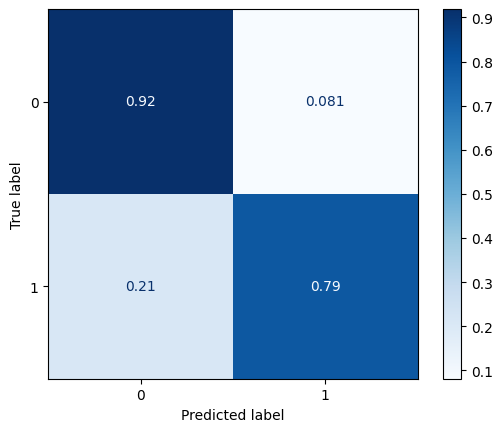

In [2094]:
# Displaying confusion matrix for testing set
ConfusionMatrixDisplay.from_predictions(y_test_ifeatures, y_test_ifpredicts, normalize='true', cmap='Blues')

##### Results

- Considering the performance metrics of all the exercises, the first MLPClassifier model is used to evaluate the performance on the testing set.

-	The MLPClassifier Neural Network model trained with important features exhibits varying performance with a weighted F1 score of 86% on the training set, 85% on the validation set, and 95% on the testing set. This suggests that the model's performance is not consistent, indicating that it may not have generalized well enough to accurately detect potentially fraudulent activities in unseen data.

-	The binary F1 score for classifying positive class instances is 86% for training and 84% for validation. However, there is a significant drop in the score to 0.0209% for testing, indicating a potential issue of overfitting (also from the training and validation scores) and highlighting the impact of class imbalance in the target classes.
-	The Recall score of 81% on training is slightly higher than the 79% on validation and 78% on the testing set, indicating that the model quite consistently identifies a higher proportion of fraudulent transactions but this score is lower as compared to the classification model from the 2nd experiment.

-	Additionally, from the confusion matrix, the rate of False Negative errors, with 19% for training, 21% for validation and 21% is higher as compared to the False negative error rate of the model from experiment 2nd indicating that the MLPClassifier model is misclassifying a significant amount of fraudulent transactions as legitimate which might lead to financial losses and loss in customer’s trust.

-	The rate of False Positive errors that denotes misclassifying legitimate transactions as fraudulent, resulted in 0.074% for training, 0.078% for validation and 0.081% is also higher in comparison to the model from 2nd experiment.

#### Deployment Suggestion

Based on the business objective of accurately classifying transactions as fraudulent and legitimate, and considering the performance scores from the model, it can be concluded that the Random Forest Model from the second experiment demonstrates superior performance.

With the capabilities of this model, combined with additional monitoring methods such as auditing or scrutiny by domain experts, the team could efficiently detect, manage, and mitigate instances of fraudulent transactions.

With this model deployed to identify fraudulent transactions, the bank can take appropriate actions in real-time, such as blocking the transaction, notifying the customer, or launching an investigation. The compliance team can then use the classifications generated by the model as an additional tool to aid their decision-making process and improve the bank's overall fraud detection capabilities.

Thus, the classification problem is crucial for preventing financial losses and maintaining the trust and security of the bank's customers.
